# Introduction
### Scientific Question: There are currently two primary vaccines that prevent SARS-CoV-2 from infecting humans, how do the Moderna and Pfizer Covid-19 vaccines differ in mRNA sequence?

SARS-CoV-2 is a viral infection that causes respiratory problems in humans. Their path of infection is through the binding of spike protein and angiotension converting enzyme 2 (ACE2) receptors which is found on the membrane of host cells (Zhang et al., 2020). 

There are many different forms of vaccines that are used, but the most common ones are mRNA vaccines. Vaccines are given so that the body is able to recognize the antigen and prepare the B cells and T cells to fight against future infections. Pfizer and Moderna both utilize mRNA vaccines and to protect the mRNA they have a lipid nanoparticle that is encased around the RNA (Francis et al., 2021).

Francis, Andre Ian, et al. “Review of COVID-19 Vaccine Subtypes, Efficacy and Geographical Distributions.” Postgraduate Medical Journal, The Fellowship of Postgraduate Medicine, 5 Aug. 2021, https://pmj.bmj.com/content/early/2021/08/05/postgradmedj-2021-140654. 

Zhang, Haibo, et al. “Angiotensin-Converting Enzyme 2 (ACE2) as a SARS-COV-2 Receptor: Molecular Mechanisms and Potential Therapeutic Target.” Intensive Care Medicine, Springer Berlin Heidelberg, 3 Mar. 2020, https://link.springer.com/article/10.1007/s00134-020-05985-9. 

### Hypothesis: If both Moderna and Pfizer are mRNA vaccines that code for spike protein, then if we compare the sequences used in the vaccines we can differentiate the similarities and differences between the vaccines.

We identify the gene sequence of Moderna and Pfizer and perform multiple sequence alignment to compare the similarities between the alpha and delta variant of COVID-19 and the difference between the two vaccines. The second bioinformatics method is pairwise sequence alignment and this is where we do the actual comparison between Moderna and Pfizer. By comparing the sequences this shows us where the mRNA vaccines differ and may lead us to finding out which portion of the mRNA vaccine makes Moderna more effective. 

To determine which regions of the mRNA vaccines are similar or different, another bioinformatics method that can be used is a dot plot. Dot plots are visual graphs that displays the changes between two or more objects. This will help differentiate the regions of similarity and difference for Moderna and Pfizer.

I tested my hypothesis by first comparing the sequences between alpha and delta COVID-19 and comparing those to the sequences of Moderna and Pfizer. This is to see the differences in the mutation and how the vaccine combats the viral infection. Then I will compare just Moderna and Pfizer and plot a dot plot to determine its region of similarities and difference.

# Loading in Packages

Pandas: Pandas is used in Python to analyze data and is most commonly the preferred package that people use. Pandas is free and an open source for data analysis. Pandas is able to create a data frame which is an object with rows and columns. The data that makes the frame is usually taken from CSV, SQL, or etc. People use Pandas because it would be eaiser to work with lists and dictionaries by using the for loops or list comprehensions.
https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673

Numpy: Numpy is used in Python to compute scientific models or problems. Numpy supports object-oriented approach which means that allows individuals to choose the specific model they want to code in. It provides a wide variety of functions such as multidimensional array object, various derived objects, and different types of operations on arrays. Numpy arrays have a fixed size, the data type has to be same, and compute mathematical function. The reason that numpy is considered fast is because of vectorization which explains why explicit looping, indexing, etc. is absent.
https://numpy.org/doc/stable/user/whatisnumpy.html

Matplotlib: Matplotlib is considered to be a massive library. This means that people often have to go through trial and error to obtain the plot that they want. Matplotlib is just the foundation for the different plots that stems from it. Basic plots with matplotlib include visualization, data structure, control strucutres, and case study. To learn about the different matplotlib functions see this index: https://matplotlib.org/2.0.2/examples/index.html

https://realpython.com/python-matplotlib-guide/

In [1]:
conda install -c bioconda pandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c bioconda numpy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c bioconda matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio import SeqIO
from Bio import AlignIO
from Bio.Seq import Seq 
from itertools import combinations

# Performing Bioinformatics Analysis

Multiple sequence alignment: Multiple sequence alignment is usually comparing three or more sequences that are of similar length. Compared to pairwise sequence alignment, multiple sequence alignment is more detailed in its information because it presents conserved regions that are within a protein family.
https://www.sciencedirect.com/topics/medicine-and-dentistry/multiple-sequence-alignment

In [5]:
from Bio import AlignIO

#we are analyzing the 4 gene sequences
alignments = AlignIO.parse("seq_multiple.fasta","fasta")

#we are comparing the sequenes to each other 
for alignment in alignments:
    print(alignment)

Alignment with 4 rows and 4004 columns
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...CTA NC_045512.2
CACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACAC...TAG MZ208926.1
GGGAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAAGACCC...AAA Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGA...TGC Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine


Pairwise Sequence Alignment: Pairwise sequence alignment is used to compare two sequences and identify the similarities between them. By identifying the similarities, this can indicate functional relationships, structural relationships, and/or evolutional relationships between the two sequences. This bioinformatics method determines compares the two sequences by determining which regions of the sequences match or mismatch. They determine the matches/mismatches of the sequences by using a scoring system. There are two types of pairwise sequence alignment which are global and local alignment. One uses the entire sequence and the other uses regions where there are higher levels of similarity. 
https://towardsdatascience.com/pairwise-sequence-alignment-using-biopython-d1a9d0ba861f

In [6]:
from Bio import SeqIO

#we are analyzing and describing the sequence of the vaccines
sequence = SeqIO.parse("blast_file.fasta", "fasta")
print(type(sequence))
print(sequence)
for s in sequence:
    print(type(s))
    print(s)

<class 'Bio.SeqIO.FastaIO.FastaIterator'>
<class 'Bio.SeqRecord.SeqRecord'>
ID: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
Name: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
Description: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
Number of features: 0
Seq('GGGAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAAGACCCCGGCGCCGCC...AAA')
<class 'Bio.SeqRecord.SeqRecord'>
ID: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
Name: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
Description: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
Number of features: 0
Seq('GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACCCGCCACC...GCA')


In [7]:
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np

# this is to set the score for the two sequences and find the similarities 
def score(sequence1, sequence2):
    a = 0
    for pos in range(0, min(len(sequence1), len(sequence2))):
        if sequence1[pos] == sequence2[pos]:
            a += 2
        if sequence1[pos] != sequence2[pos]:
            a += -1
        if sequence1[pos] == sequence2[pos] == '-':
            a += -2
    return a

# this is comparing the two sequences using the score that was created above
def sequence_compare(file):
    seq_records = SeqIO.parse(file, "fasta")
    array = np.empty(1, int)
    for record1, record2 in combinations(seq_records, 2):
        sequence1 = record1.seq
        sequence2 = record2.seq
        a = score(sequence1, sequence2)
        array = np.append(array, [a], axis = 0)
        print(sequence1)
        print(sequence2)
        print(a)

sequence_compare("blast_file.fasta")

GGGAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAAGACCCCGGCGCCGCCACCATGTTCGTGTTCCTGGTGCTGCTGCCCCTGGTGAGCAGCCAGTGCGTGAACCTGACCACCCGGACCCAGCTGCCACCAGCCTACACCAACAGCTTCACCCGGGGCGTCTACTACCCCGACAAGGTGTTCCGGAGCAGCGTCCTGCACAGCACCCAGGACCTGTTCCTGCCCTTCTTCAGCAACGTGACCTGGTTCCACGCCATCCACGTGAGCGGCACCAACGGCACCAAGCGGTTCGACAACCCCGTGCTGCCCTTCAACGACGGCGTGTACTTCGCCAGCACCGAGAAGAGCAACATCATCCGGGGCTGGATCTTCGGCACCACCCTGGACAGCAAGACCCAGAGCCTGCTGATCGTGAATAACGCCACCAACGTGGTGATCAAGGTGTGCGAGTTCCAGTTCTGCAACGACCCCTTCCTGGGCGTGTACTACCACAAGAACAACAAGAGCTGGATGGAGAGCGAGTTCCGGGTGTACAGCAGCGCCAACAACTGCACCTTCGAGTACGTGAGCCAGCCCTTCCTGATGGACCTGGAGGGCAAGCAGGGCAACTTCAAGAACCTGCGGGAGTTCGTGTTCAAGAACATCGACGGCTACTTCAAGATCTACAGCAAGCACACCCCAATCAACCTGGTGCGGGATCTGCCCCAGGGCTTCTCAGCCCTGGAGCCCCTGGTGGACCTGCCCATCGGCATCAACATCACCCGGTTCCAGACCCTGCTGGCCCTGCACCGGAGCTACCTGACCCCAGGCGACAGCAGCAGCGGGTGGACAGCAGGCGCGGCTGCTTACTACGTGGGCTACCTGCAGCCCCGGACCTTCCTGCTGAAGTACAACGAGAACGGCACCATCACCGACGCCGTGGACTGCGCCCTGGACCCTCTGAGCGAGACCAAGTGCACCCTGAAGAGCTTCACCGTGGAGAAGGGCATCTACCAGA

# Plotting the Results

Dot plots: Dot plots are used to compare two objects and display the changes between them. Dot plots are known to be simpler and easier to read because it is not as cluttered. Each value that is presented on the graph could be correlated but it does not mean they are connected to one another.
https://www.includehelp.com/python/dot-plot.aspx

GGGAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAAGACCCCGGCGCCGCCACCATGTTCGTGTTCCTGGTGCTGCTGCCCCTGGTGAGCAGCCAGTGCGTGAACCTGACCACCCGGACCCAGCTGCCACCAGCCTACACCAACAGCTTCACCCGGGGCGTCTACTACCCCGACAAGGTGTTCCGGAGCAGCGTCCTGCACAGCACCCAGGACCTGTTCCTGCCCTTCTTCAGCAACGTGACCTGGTTCCACGCCATCCACGTGAGCGGCACCAACGGCACCAAGCGGTTCGACAACCCCGTGCTGCCCTTCAACGACGGCGTGTACTTCGCCAGCACCGAGAAGAGCAACATCATCCGGGGCTGGATCTTCGGCACCACCCTGGACAGCAAGACCCAGAGCCTGCTGATCGTGAATAACGCCACCAACGTGGTGATCAAGGTGTGCGAGTTCCAGTTCTGCAACGACCCCTTCCTGGGCGTGTACTACCACAAGAACAACAAGAGCTGGATGGAGAGCGAGTTCCGGGTGTACAGCAGCGCCAACAACTGCACCTTCGAGTACGTGAGCCAGCCCTTCCTGATGGACCTGGAGGGCAAGCAGGGCAACTTCAAGAACCTGCGGGAGTTCGTGTTCAAGAACATCGACGGCTACTTCAAGATCTACAGCAAGCACACCCCAATCAACCTGGTGCGGGATCTGCCCCAGGGCTTCTCAGCCCTGGAGCCCCTGGTGGACCTGCCCATCGGCATCAACATCACCCGGTTCCAGACCCTGCTGGCCCTGCACCGGAGCTACCTGACCCCAGGCGACAGCAGCAGCGGGTGGACAGCAGGCGCGGCTGCTTACTACGTGGGCTACCTGCAGCCCCGGACCTTCCTGCTGAAGTACAACGAGAACGGCACCATCACCGACGCCGTGGACTGCGCCCTGGACCCTCTGAGCGAGACCAAGTGCACCCTGAAGAGCTTCACCGTGGAGAAGGGCATCTACCAGA

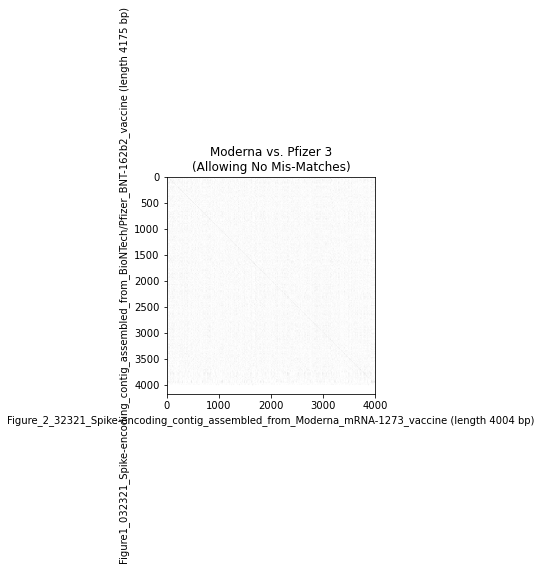

In [8]:
from Bio import SeqIO
import numpy as np

#loaded in the gene sequence for the fasta file
Fasta = list(SeqIO.parse("blast_file.fasta","fasta"))
Sequence_moderna = Fasta[0].seq
Sequence_pfizer = Fasta[1].seq
print(Sequence_moderna)
print(Sequence_pfizer)

#we are establishing the window size and the axis of the dot plot
window = 3
seq1 = str(Sequence_moderna)
seq2 = str(Sequence_pfizer)

#comparing all i and j in the range of length of sequence
data = [
    [
        (seq1[i:i+window] != seq2[j:j+window])
        for j in range(len(seq1) - window)
    ]
    for i in range(len(seq2) - window)
]

#labeling the graph and displaying the graph
import pylab
pylab.gray()
pylab.imshow(data)
pylab.xlabel("%s (length %i bp)" % (Fasta[0].id, len(Fasta[0].seq)))
pylab.ylabel("%s (length %i bp)" % (Fasta[1].id, len(Fasta[1].seq)))
pylab.title("Moderna vs. Pfizer %i\n(Allowing No Mis-Matches)" % window)
pylab.show()

# Analysis

The dot plot above displays the relationship between the mRNA sequence of Moderna and Pfizer vaccine. On the x axis, we have the Moderna sequence and the y axis we have the Pfizer sequence. The gray line that is drawn on the graph represents the similar regions between both of the vaccines. This data seen in the dot plot makes sense because there will be similarities between the vaccines seeing as how they both contain the mRNA sequence of the Spike protein but at different regions. My hypothesis was correct where comparing the gene sequenes between Moderna and Pfizer, we see a strong correlation between the two vaccines and we are able to see the regions where they are similar and where they differ.